## Wing Hyun and Wei En

Hello this is Project 5!! We are analysing the data of the people who played the Beantastic card games to find out more about the changes in certain aspects of their wellbeing, as well as the relationships between the different demographic groups and how they answered certain questions. 

These are the three questions we will seek to answer in this analysis:

1. Are there significant changes in the response of participants after playing Beantastic?
2. Is there a relationship in the way participants respond amongst the different categories (eg emotional intelligence vs empathy, emotional resilience and social support etc) --- might get rid
3. Does the demographic affect the extent of change in the different categories of well-being they have (eg emotional resilience)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr

import geopandas as gp
import folium as fl
import scipy.stats as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

wr.filterwarnings('ignore')

df = pd.read_csv("processed_beantastic_data.csv")

df.columns

Index(['te', 'please select your age group', 'job status', 'other',
       'over the last two weeks, i have felt cheerful and in good spirits',
       'over the last two weeks, i have felt calm and relaxed',
       'over the last two weeks, i have felt active and vigorous',
       'over the last two weeks, i woke up feeling fresh and rested',
       'over the last two weeks, my daily life has been filled with things that interest me',
       'social support_pre',
       'if you can learn anything from todayâ€™s session, what do you hope to take away? how is it important for you? what difference might it make for you?',
       'share your email!', 'start date (utc)_pre', 'submit date (utc)_pre',
       'network id_pre', 'initiative_pre', 'resilience_pre',
       'emotional stability_pre', 'empathy_pre', 'emotional intelligence_pre',
       'open-mindedness_pre', '#',
       'after the session, i feel cheerful and in good spirits',
       'after the session, i feel calm and relaxed',
   

In [2]:
df['mood_pre'] = (df['over the last two weeks, i have felt cheerful and in good spirits'] 
                  + df['over the last two weeks, i have felt calm and relaxed'] 
                  + df['over the last two weeks, i have felt active and vigorous'] 
                  + df['over the last two weeks, i woke up feeling fresh and rested'] 
                  + df['over the last two weeks, my daily life has been filled with things that interest me']) / 25 * 100
df['mood_post'] = (df['after the session, i feel cheerful and in good spirits'] 
                   + df['after the session, i feel calm and relaxed'] 
                   + df['after the session, i feel active and vigorous'] 
                   + df['after the session, i feel fresh and rested'] 
                   + df['after the session, my life has been filled with things that interest me']) / 25 * 100
df['change in mood'] = (df['mood_post'] - df['mood_pre']) / df['mood_pre'] * 100

In [4]:
data = pd.read_csv("survey_results_with_changes1.csv")
data.columns

Index(['te', 'please select your age group_pre', 'job status', 'other',
       'over the last two weeks, i have felt cheerful and in good spirits',
       'over the last two weeks, i have felt calm and relaxed',
       'over the last two weeks, i have felt active and vigorous',
       'over the last two weeks, i woke up feeling fresh and rested',
       'over the last two weeks, my daily life has been filled with things that interest me',
       'i am able to persevere in the face of challenges._pre',
       ...
       'change in i can imagine what itâ€™s like to be in someone elseâ€™s shoes.',
       'change in i can tell the difference between my friendâ€™s feelings and my own.',
       'change in i consider other peopleâ€™s points of view in discussions.',
       'change in when i am with someone who gets sad news, i feel sad for a moment too.',
       'change in when i am upset or unhappy, i get over it quickly.',
       'change in i can explain to others how i am feeling.',
      

### Question 1: Are there significant changes in the response of participants after playing Beantastic?

We will be using four different scales to demonstrate the changes in the response of participants before and after the game. 

#### Question 1.1: Are there significant changes in the different categories of well-being after playing Beantastic?

The first scale we will be using is a scale that we came up with on our own by classifying all the various questions into specific categories.

First, we will visualise the data to see the extent of changes in the different categories of wellbeing after playing Beantastic.

In [ ]:
df2 = df[['change in initiative', 'change in resilience',
       'change in emotional stability', 'change in empathy',
       'change in emotional intelligence', 'change in open-mindedness', 
       'change in mood']]
df2.describe()

#use the scales provided by shane -- different scales may have different results
#can help project 4 with similar analyses (trang, berry, linh)

,change in initiative,change in resilience,change in emotional stability,change in empathy,change in emotional intelligence,change in open-mindedness,change in mood
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,4.832852,2.835823,6.694434,2.113490,4.201361,5.433312,35.754939
std,17.378335,11.615708,16.795941,10.315226,10.348186,18.494487,56.051785
min,-33.333333,-29.032258,-30.434783,-25.000000,-22.580645,-35.714286,-23.076923
25%,0.000000,-4.545455,-2.777778,-3.175403,0.000000,0.000000,5.263158
50%,0.000000,0.000000,5.263158,0.000000,3.225806,0.000000,20.000000
75%,14.285714,9.761905,13.809524,7.692308,8.452381,10.555556,50.000000
max,60.000000,31.250000,71.428571,34.782609,52.631579,125.000000,400.000000


<Axes: >

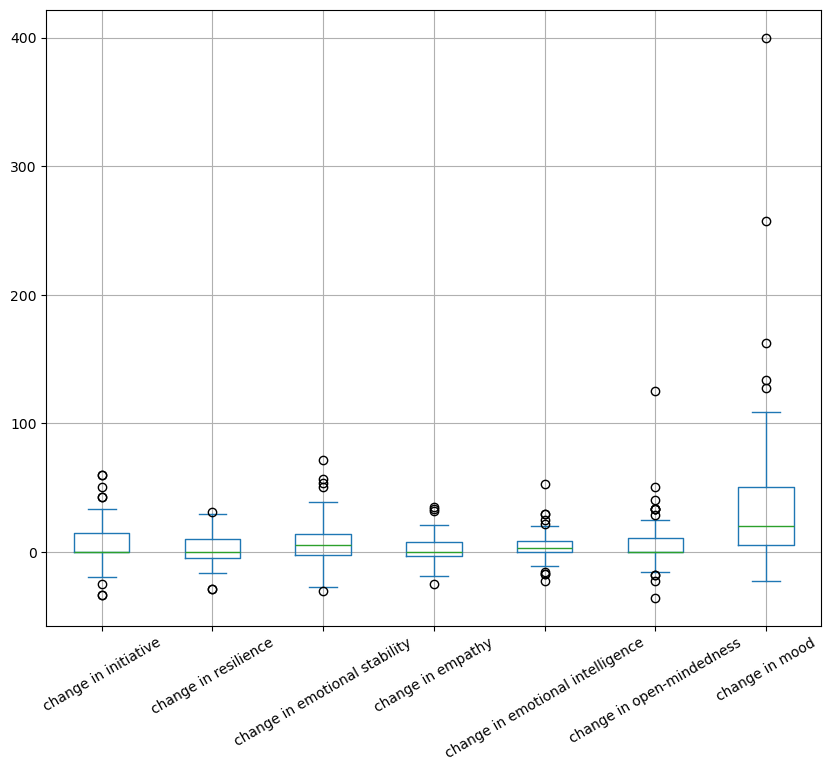

In [ ]:
df2.plot.box(figsize=(10, 8), rot=30, grid=True)

From the above boxplot and summary of statistics, the greatest change would be that for mood as the median of the change in mood is largest at 20 percentage points, while initiative, resilience, empathy and open-mindedness changed the least as the median of change is 0 percentage points. 

The change in mood varied the most while the change in empathy varied the least, as visualised by the spread of data in the IQR of the boxplots.

Now, we will be performing t-tests to see whether these changes in the different categories of well-being are significant.

In [ ]:
def runtest(x):
    group1 = df[x+"_pre"]
    group2 = df[x+"_post"]
    return sp.ttest_ind(group1, group2, equal_var=False)

In [ ]:
runtest("initiative")

TtestResult(statistic=-1.1480756957638547, pvalue=0.2523381354803541, df=195.78776903064878)

In [ ]:
runtest("resilience")

TtestResult(statistic=-0.7923105587775096, pvalue=0.4291395978573438, df=195.57882592518774)

In [ ]:
runtest("emotional stability")

TtestResult(statistic=-1.9036304984464805, pvalue=0.05842694777920788, df=195.53851975738672)

In [ ]:
runtest("empathy")

TtestResult(statistic=-0.959141719519839, pvalue=0.33868855060530445, df=192.8088201776519)

In [ ]:
runtest("emotional intelligence")

TtestResult(statistic=-1.62481550557297, pvalue=0.10581437685643937, df=195.32643874085713)

In [ ]:
runtest("open-mindedness")

TtestResult(statistic=-1.330650597554177, pvalue=0.18485764205967045, df=195.03410599696065)

In [ ]:
runtest("mood")

TtestResult(statistic=-6.284718865753159, pvalue=2.0958151996585854e-09, df=195.37760670861385)

From the above t-tests for significance in the change in responses in each well-being category after playing Beantastic, there was an overall significant improvement in mood at 5% significance level. However, none of the other categories in relation to mental wellbeing were statistically significant at 5% significance level, though some categories, like emotional stability and emotional intelligence, came closer to being statistically significant as their p-values were still relatively low at about 0.0584 and 0.106 respectively. 

This implies that playing Beantastic would most likely help with regards to boosting one's emotions, and may help to a smaller extent with regards to how one recognises and handles their own emotions. However, other aspects in terms of how people treat others, such as empathy, open-mindedness, or how people respond to stresses, such as resilience and initiative, may not change significantly after playing the game.

#### Question 1.2: Is there a change in the empathy of participants after playing Beantastic?

The scale we will be using is based on the Empathy Assessment Index (EAI), which consists of 5 categories: Affective Response (AR), Emotional Regulation (ER), Perspective Taking (PT), Self-Other Awareness (SOA) and Empathetic Attitudes (EA). After classifying the questions in the survey according to these categories, we have excluded the EA category as no questions match the definition of EA.

First, we will visualise the data to see the extent of changes in the different categories of empathy after playing Beantastic.

In [5]:
def addcolumns(olddata, newdata, list, category):
    newdata[category + "_pre"] = 0
    newdata[category + "_post"] = 0
    for i in list:
        newdata[i + "_pre"] = olddata[i + "_pre"]
        newdata[category + "_pre"] += newdata[i + "_pre"]
        newdata[i + "_post"] = olddata[i + "_post"]
        newdata[category + "_post"] += newdata[i + "_post"]
    newdata[category + "_pre"] = newdata[category + "_pre"] / (len(list) * 5) * 100
    newdata[category + "_post"] = newdata[category + "_post"] / (len(list) * 5) * 100
    pre = newdata[category + "_pre"]
    post = newdata[category + "_post"]
    newdata["change in " + category] = (post - pre) / pre * 100

In [9]:
ARlist = [
    "when. i see someone receive a gift that makes them happy, i feel happy myself.",
    "when i see someone being publicly embarrassed i cringe a little.",
    "when i see someone accidently hit his or her thumb with a hammer, i feel a flash of pain myself.",
    "when i am with someone who gets sad news, i feel sad for a moment too.",
    "hearing laughter makes me smile."
]

ERlist = [ 
    "emotional stability describes me well.",
    "when i get angry, i need a lot of time to get over it.",
    "friends view me as a moody person.",
    "when i am upset or unhappy, i get over it quickly."
]

PTlist = [
    "i am good at understanding other peopleâ€™s emotions.",
    "i can consider my point of view and another personâ€™s point of view at the same time.",
    "i can imagine what the character is feeling in a good movie.",
    "when i see a person experiencing a strong emotion i can accurately assess what that person is feeling.",
    "i can imagine what itâ€™s like to be in someone elseâ€™s shoes.",
    "i consider other peopleâ€™s points of view in discussions.",
    "i can agree to disagree with other people.",
    "i am aware of other people's emotions."
]

SOAlist = [
    "i can tell the difference between someone elseâ€™s feelings and my own.",
    "when i see a person experiencing a strong emotion, i can describe what the person is feeling to someone else.",
    "i can tell the difference between my friendâ€™s feelings and my own.",
    "i can explain to others how i am feeling.",
    "i am aware of what other people think of me."
]

# some of the questions are not included in the questionnaire but somewhat similar to 
# those given in the questionnaire of the journal article so 
# i classified them accordingly, should i only keep questions that are featured in
# the questionnaire?

data2 = data[["te", "#"]]
addcolumns(data, data2, ARlist, "AR")
addcolumns(data, data2, ERlist, "ER")
addcolumns(data, data2, PTlist, "PT")
addcolumns(data, data2, SOAlist, "SOA")
data2_selected = data2[["change in AR", "change in ER", "change in PT", "change in SOA"]]
data2_selected.describe()

,change in AR,change in ER,change in PT,change in SOA
count,99.000000,99.000000,99.000000,99.000000
mean,1.882945,7.478876,4.570778,3.737547
std,11.688570,15.039453,12.441412,11.716764
min,-40.909091,-25.000000,-22.580645,-33.333333
25%,-4.446640,0.000000,0.000000,0.000000
50%,0.000000,8.333333,2.777778,0.000000
75%,9.090909,14.583333,8.514493,8.893281
max,42.857143,50.000000,80.000000,38.461538


<Axes: >

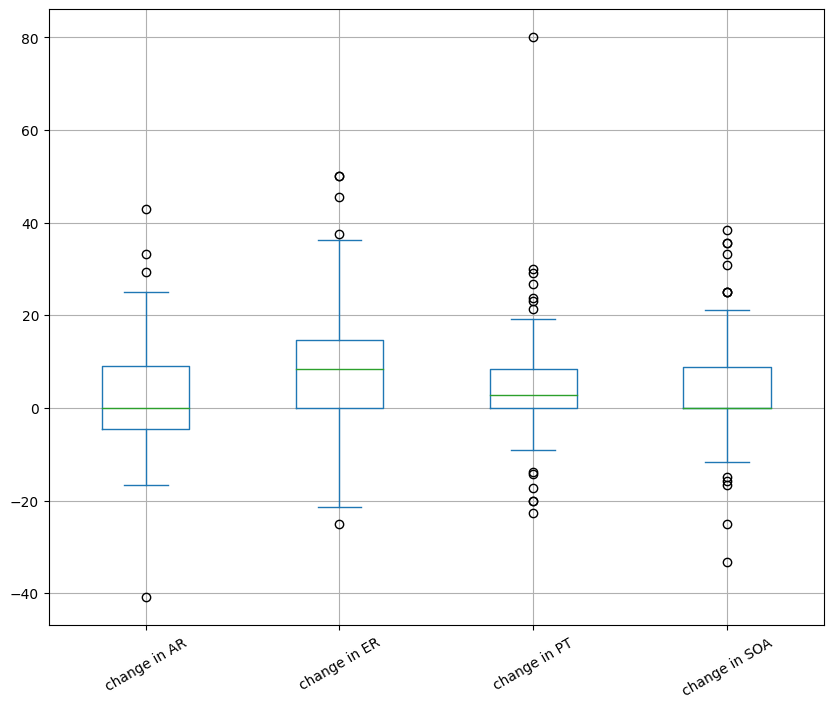

In [10]:
data2_selected.plot.box(figsize=(10, 8), rot=30, grid=True)

From the above boxplot and summary of statistics, we can see that, overall, there is an  increase in all categories of empathy, as seen by the medians of all 4 categories being greater than 0. The greatest change would be that for ER as the median of the change in ER is largest at 8.33 percentage points, while AR and SOA changed the least as the median of change of AR is 0 percentage points. 

The change in ER varied the most while the change in AR varied the least, as visualised by the spread of IQR data in the boxplot as well as the standard deviations shown above.

Now, we will be performing t-tests to see whether these changes in the different categories of empathy are significant.

In [11]:
data3 = data2[["AR_pre", "AR_post", "ER_pre", "ER_post", "PT_pre", "PT_post", "SOA_pre", "SOA_post"]]
data3.describe()

,AR_pre,AR_post,ER_pre,ER_post,PT_pre,PT_post,SOA_pre,SOA_post
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,79.434343,80.565657,58.787879,62.424242,76.994949,79.949495,75.070707,77.373737
std,10.552262,11.752691,8.662932,8.124153,11.655010,12.142751,12.775337,13.219177
min,52.000000,52.000000,40.000000,45.000000,37.500000,52.500000,48.000000,52.000000
25%,72.000000,72.000000,55.000000,60.000000,70.000000,72.500000,64.000000,68.000000
50%,80.000000,80.000000,60.000000,60.000000,77.500000,80.000000,76.000000,76.000000
75%,88.000000,92.000000,65.000000,65.000000,85.000000,90.000000,84.000000,88.000000
max,100.000000,100.000000,80.000000,80.000000,97.500000,100.000000,100.000000,100.000000


In [22]:
def runtest2(x):
    group1 = data3[x+"_pre"]
    group2 = data3[x+"_post"]
    return sp.ttest_ind(group1, group2, equal_var=False)

In [ ]:
runtest2("AR")

TtestResult(statistic=-0.7126660214204183, pvalue=0.47690975182577366, df=193.7679700903481)

In [ ]:
runtest2("ER")

TtestResult(statistic=-3.0464992227104952, pvalue=0.0026353570519972594, df=195.19737928381537)

In [ ]:
runtest2("PT")

TtestResult(statistic=-1.746610133515532, pvalue=0.08227414479981104, df=195.67150478048097)

In [ ]:
runtest2("SOA")

TtestResult(statistic=-1.246485534115125, pvalue=0.2140755893218795, df=195.7718359526213)

From the above t-tests for significance in the change in responses in each empathy category after playing Beantastic, there was an overall significant improvement in emotional regulation (ER) at 5% significance level. However, none of the other categories in relation to empathy were statistically significant at 5% significance level, though perspective taking came closer to being statistically significant as its p-value was still relatively low at about 0.0823. 

This implies that playing Beantastic would most likely help with regards to managing strong emotions. Relating to section 1.1, the analyses thus far show that playing the game significantly improves one's own mood as well as the ability to regulate their own emotions. Perhaps more analyses could be performed to investigate whether these two are correlated. 

However, other aspects in terms of how intensely one feels others' emotions or one's abilitiy to differentiate and express others' vs their own emotions may not change significantly after playing the game.

#### Question 1.3: Is there a change in the resilience of participants after playing Beantastic?

The scale we will be using is based on the Connor-Davidson Resilience Scale (CD-RISC), a test that measures resilience or how well one is equipped to bounce back after stressful events, tragedy, or trauma. We will be using CD-RISC-10, the 10-item scale is comprised of ten of the original 25 items from the CD-RISC-10 scale, these ten items include:
- I am able to adapt when changes occur.
- I can deal with whatever comes my way.
- I try to see the humorous side of things when I am faced with problems.
- Having to cope with stress can make me stronger.
- I tend to bounce back after illness, injury or other hardships.
- I believe I can achieve my goals, even if there are obstacles.
- Under pressure, I stay focused and think clearly.
- I am not easily discouraged by failure.
- I think of myself as a strong person when dealing with life’s challenges and difficulties.
- I am able to handle unpleasant or painful feelings like sadness, fear, and anger. 

After matching the questions in the survey to each item, we have excluded the items "I try to see the humorous side of things when I am faced with problems." and "Under pressure, I stay focused and think clearly."

First, we will visualise the data to see the extent of changes in the different categories of resilience after playing Beantastic.

In [18]:
def addcolumns1(olddata, newdata, question_list, category, reverse=False):
    newdata[category + "_pre"] = 0
    newdata[category + "_post"] = 0
    
    for question in question_list:
        if reverse:
            newdata[question + "_pre"] = 6 - olddata[question + "_pre"]
            newdata[question + "_post"] = 6 - olddata[question + "_post"]
        else:
            newdata[question + "_pre"] = olddata[question + "_pre"]
            newdata[question + "_post"] = olddata[question + "_post"]
        
        newdata[category + "_pre"] += newdata[question + "_pre"]
        newdata[category + "_post"] += newdata[question + "_post"]
    
    # Calculate percentages
    newdata[category + "_pre"] = (newdata[category + "_pre"] / (len(question_list) * 5)) * 100
    newdata[category + "_post"] = (newdata[category + "_post"] / (len(question_list) * 5)) * 100
    
    # Calculate percentage change
    pre = newdata[category + "_pre"]
    post = newdata[category + "_post"]
    newdata["change in " + category] = (post - pre) / pre * 100

In [20]:
I_believe_I_can_achieve_my_goals_even_if_there_are_obstacles = [
    "i am able to persevere in the face of challenges."
]

I_am_able_to_handle_unpleasant_or_painful_feelings_like_sadness_fear_and_anger = [ 
    "i know how i can manage negative thoughts and emotions."
]

I_tend_to_bounce_back_after_illness_injury_or_other_hardships = [
    "i tend to bounce back quickly after hard times.."
]

Having_to_cope_with_stress_can_make_me_stronger = [
    "i have a hard time making it through stressful events."
]

I_can_deal_with_whatever_comes_my_way = [
    "it does not take me long to recover from a stressful event."
]

I_think_of_myself_as_a_strong_person_when_dealing_with_lifes_challenges_and_difficulties = [
    "it is hard for me to snap back when something bad happens"
]

I_am_able_to_adapt_when_changes_occur = [
    "i usually come through difficult times with little trouble."
]

I_am_not_easily_discouraged_by_failure = [
    "i tend to take a long time to get over setbacks in my life.."
]

data4 = data[["te", "#"]]
print(data4.columns)
addcolumns(data, data4, I_believe_I_can_achieve_my_goals_even_if_there_are_obstacles, "I believe I can achieve my goals, even if there are obstacles.")
addcolumns(data, data4, I_am_able_to_handle_unpleasant_or_painful_feelings_like_sadness_fear_and_anger, "I am able to handle unpleasant or painful feelings like sadness, fear, and anger.")
addcolumns(data, data4, I_tend_to_bounce_back_after_illness_injury_or_other_hardships, "I tend to bounce back after illness, injury or other hardships.")
addcolumns1(data, data4, Having_to_cope_with_stress_can_make_me_stronger, "Having to cope with stress can make me stronger.", reverse = True)
addcolumns(data, data4, I_can_deal_with_whatever_comes_my_way, "I can deal with whatever comes my way.")
addcolumns1(data, data4, I_think_of_myself_as_a_strong_person_when_dealing_with_lifes_challenges_and_difficulties, "I think of myself as a strong person when dealing with life’s challenges and difficulties.", reverse = True)
addcolumns(data, data4, I_am_able_to_adapt_when_changes_occur, "I am able to adapt when changes occur.")
addcolumns1(data, data4, I_am_not_easily_discouraged_by_failure, "I am not easily discouraged by failure.", reverse = True)
data4_selected = data4[["change in I believe I can achieve my goals, even if there are obstacles.", 
"change in I am able to handle unpleasant or painful feelings like sadness, fear, and anger.", 
"change in I tend to bounce back after illness, injury or other hardships.", 
"change in Having to cope with stress can make me stronger.",
"change in I can deal with whatever comes my way.",
"change in I think of myself as a strong person when dealing with life’s challenges and difficulties.",
"change in I am able to adapt when changes occur.",
"change in I am not easily discouraged by failure."]]
data4_selected.describe()

Index(['te', '#'], dtype='object')


,"change in I believe I can achieve my goals, even if there are obstacles.","change in I am able to handle unpleasant or painful feelings like sadness, fear, and anger.","change in I tend to bounce back after illness, injury or other hardships.",change in Having to cope with stress can make me stronger.,change in I can deal with whatever comes my way.,change in I think of myself as a strong person when dealing with life’s challenges and difficulties.,change in I am able to adapt when changes occur.,change in I am not easily discouraged by failure.
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,7.845118,14.696970,7.373737,8.047138,14.629630,1.043771,15.892256,4.612795
std,22.113719,32.331338,23.907051,62.095877,44.880514,42.360606,44.854459,41.109077
min,-40.000000,-40.000000,-40.000000,-75.000000,-66.666667,-75.000000,-50.000000,-75.000000
25%,0.000000,0.000000,0.000000,-29.166667,0.000000,-20.000000,0.000000,-22.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,25.000000,33.333333,25.000000,33.333333,33.333333,0.000000,33.333333,29.166667
max,100.000000,150.000000,100.000000,400.000000,300.000000,200.000000,300.000000,150.000000


<Axes: >

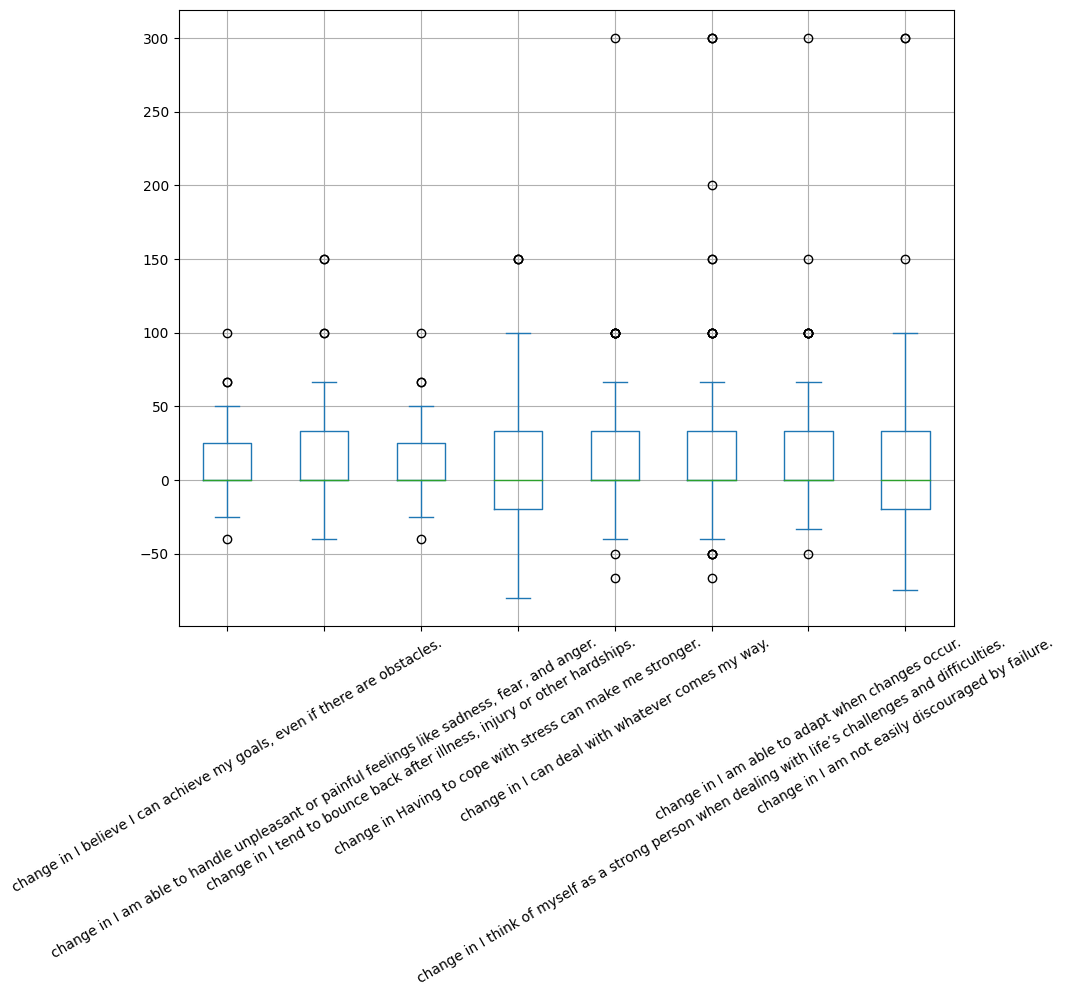

In [16]:
data4_selected.plot.box(figsize=(10, 8), rot=30, grid=True)

From the above boxplot and summary of statistics, we can see that, overall, there is no change in any of the items of resilience as the median of change for every item is 0 percentage points.

The change in the item "Having to cope with stress can make me stronger." varied the most while the change in the item "I believe I can achieve my goals, even if there are obstacles." varied the least, as visualised by the spread of IQR data in the boxplots as well as the standard deviations shown above.

Now, we will be performing t-tests to see whether these changes in the different items of resilience are significant.

In [21]:
data4 = data4[["I believe I can achieve my goals, even if there are obstacles._pre", "I believe I can achieve my goals, even if there are obstacles._post", 
"I am able to handle unpleasant or painful feelings like sadness, fear, and anger._pre", "I am able to handle unpleasant or painful feelings like sadness, fear, and anger._post", 
"I tend to bounce back after illness, injury or other hardships._pre", "I tend to bounce back after illness, injury or other hardships._post", 
"Having to cope with stress can make me stronger._pre", "Having to cope with stress can make me stronger._post",
"I can deal with whatever comes my way._pre", "I can deal with whatever comes my way._post",
"I think of myself as a strong person when dealing with life’s challenges and difficulties._pre", "I think of myself as a strong person when dealing with life’s challenges and difficulties._post",
"I am able to adapt when changes occur._pre", "I am able to adapt when changes occur._post",
"I am not easily discouraged by failure._pre", "I am not easily discouraged by failure._post"]]
data4.describe()

,"I believe I can achieve my goals, even if there are obstacles._pre","I believe I can achieve my goals, even if there are obstacles._post","I am able to handle unpleasant or painful feelings like sadness, fear, and anger._pre","I am able to handle unpleasant or painful feelings like sadness, fear, and anger._post","I tend to bounce back after illness, injury or other hardships._pre","I tend to bounce back after illness, injury or other hardships._post",Having to cope with stress can make me stronger._pre,Having to cope with stress can make me stronger._post,I can deal with whatever comes my way._pre,I can deal with whatever comes my way._post,I think of myself as a strong person when dealing with life’s challenges and difficulties._pre,I think of myself as a strong person when dealing with life’s challenges and difficulties._post,I am able to adapt when changes occur._pre,I am able to adapt when changes occur._post,I am not easily discouraged by failure._pre,I am not easily discouraged by failure._post
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,76.363636,80.000000,71.515152,78.383838,71.111111,74.141414,61.212121,59.191919,67.474747,71.717172,66.868687,62.828283,63.434343,69.090909,63.030303,61.616162
std,15.743774,12.777531,16.435628,14.193062,16.714218,15.714942,19.549661,20.979911,19.290657,16.662337,20.436385,20.205092,17.388808,17.207670,18.375591,19.520114
min,40.000000,60.000000,40.000000,60.000000,40.000000,40.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,40.000000,20.000000,20.000000
25%,60.000000,80.000000,60.000000,60.000000,60.000000,60.000000,60.000000,40.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,40.000000
50%,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,60.000000,60.000000,60.000000,80.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
75%,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [24]:
def runtest3(x):
    group1 = data4[x+"_pre"]
    group2 = data4[x+"_post"]
    return sp.ttest_ind(group1, group2, equal_var=False)

In [26]:
runtest3("I believe I can achieve my goals, even if there are obstacles.")

TtestResult(statistic=-1.7844090123807688, pvalue=0.07596958616327046, df=188.03776038410564)

In [27]:
runtest3("I am able to handle unpleasant or painful feelings like sadness, fear, and anger.")

TtestResult(statistic=-3.1471461300311243, pvalue=0.0019117358697440109, df=191.92818015110396)

In [28]:
runtest3("I tend to bounce back after illness, injury or other hardships.")

TtestResult(statistic=-1.3142466444770529, pvalue=0.1903049916730841, df=195.25980140713025)

In [29]:
runtest3("Having to cope with stress can make me stronger.")

TtestResult(statistic=0.7009469179408534, pvalue=0.48417159283315536, df=195.03091367031809)

In [30]:
runtest3("I can deal with whatever comes my way.")

TtestResult(statistic=-1.6559767157930514, pvalue=0.09936046652647827, df=191.94040043959322)

In [31]:
runtest3("I think of myself as a strong person when dealing with life’s challenges and difficulties.")

TtestResult(statistic=1.3988813422105033, pvalue=0.16342919359335933, df=195.9746124445363)

In [32]:
runtest3("I am able to adapt when changes occur.")

TtestResult(statistic=-2.3006342949874794, pvalue=0.022464739025518987, df=195.97851171714402)

In [33]:
runtest3("I am not easily discouraged by failure.")

TtestResult(statistic=0.5248527405527357, pvalue=0.6002808696105546, df=195.28876306814433)

From the above t-tests for significance in the change in responses in each empathy category after playing Beantastic, there was an overall significant change in the items "I am able to handle unpleasant or painful feelings like sadness, fear, and anger." and "I am able to adapt when changes occur." at 5% significance level. However, none of the other categories in relation to resilience were statistically significant at 5% significance level.

This implies that playing Beantastic would most likely help with regards to managing emotions, which was concluded in Section 1.2.
This also implies that playing Beantastic would also most likely help with regards to being adaptable and flexible. 

However, other aspects of resilience may not change after playing the game. 

#### Question 1.4: Is there a change in the NYC Youth Development Outcomes of participants after playing Beantastic?

The scale we will be using is based on the NYC youth development outcomes and indicators, which consists of 7 categories: Confidence, Tenacity, Growth Mindset, Empathy, Teamwork, Emotional Management and Emotional Support. After classifying the questions in the survey according to these categories, we have excluded the Confidence, Growth Mindset and Emotional Support categories as no questions match their definitions.

First, we will visualise the data to see the extent of changes in the different categories of the NYC youth development outcomes after playing Beantastic.

In [34]:
def addcolumns_tenacity(olddata, newdata, question_list, category):

    newdata[category + "_pre"] = 0
    newdata[category + "_post"] = 0
    
    for i, question in enumerate(question_list):
        if i == 1: 
            newdata[question + "_pre"] = 6 - olddata[question + "_pre"]
            newdata[question + "_post"] = 6 - olddata[question + "_post"]
        else: 
            newdata[question + "_pre"] = olddata[question + "_pre"]
            newdata[question + "_post"] = olddata[question + "_post"]
        
        newdata[category + "_pre"] += newdata[question + "_pre"]
        newdata[category + "_post"] += newdata[question + "_post"]
    
    newdata[category + "_pre"] = (newdata[category + "_pre"] / (len(question_list) * 5)) * 100
    newdata[category + "_post"] = (newdata[category + "_post"] / (len(question_list) * 5)) * 100

    pre = newdata[category + "_pre"]
    post = newdata[category + "_post"]
    newdata["change in " + category] = (post - pre) / pre * 100


In [41]:
TenacityList = [
    "i am able to persevere in the face of challenges.",
    "i tend to take a long time to get over setbacks in my life.."
]

EmpathyList = [ 
    "i can imagine what itâ€™s like to be in someone elseâ€™s shoes."
]

TeamworkList = [
    "i consider other peopleâ€™s points of view in discussions.",
    "i can consider my point of view and another personâ€™s point of view at the same time."
]

EmotionalManagementList = [
    "i know how i can manage negative thoughts and emotions."
]

data6 = data[["te", "#"]]
print(data6.columns)
addcolumns_tenacity(data, data6, TenacityList, "Tenacity")
addcolumns(data, data6, EmpathyList, "Empathy")
addcolumns(data, data6, TeamworkList, "Teamwork")
addcolumns(data, data6, EmotionalManagementList, "Emotional Management")

data6_selected = data6[["change in Tenacity", "change in Empathy", "change in Teamwork", "change in Emotional Management"]]
data6_selected.describe()

Index(['te', '#'], dtype='object')


,change in Tenacity,change in Empathy,change in Teamwork,change in Emotional Management
count,99.000000,99.000000,99.000000,99.000000
mean,3.622735,5.050505,5.130672,14.696970
std,19.037225,17.424041,24.389331,32.331338
min,-44.444444,-33.333333,-33.333333,-40.000000
25%,-11.111111,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,16.666667,0.000000,13.392857,33.333333
max,50.000000,66.666667,166.666667,150.000000


<Axes: >

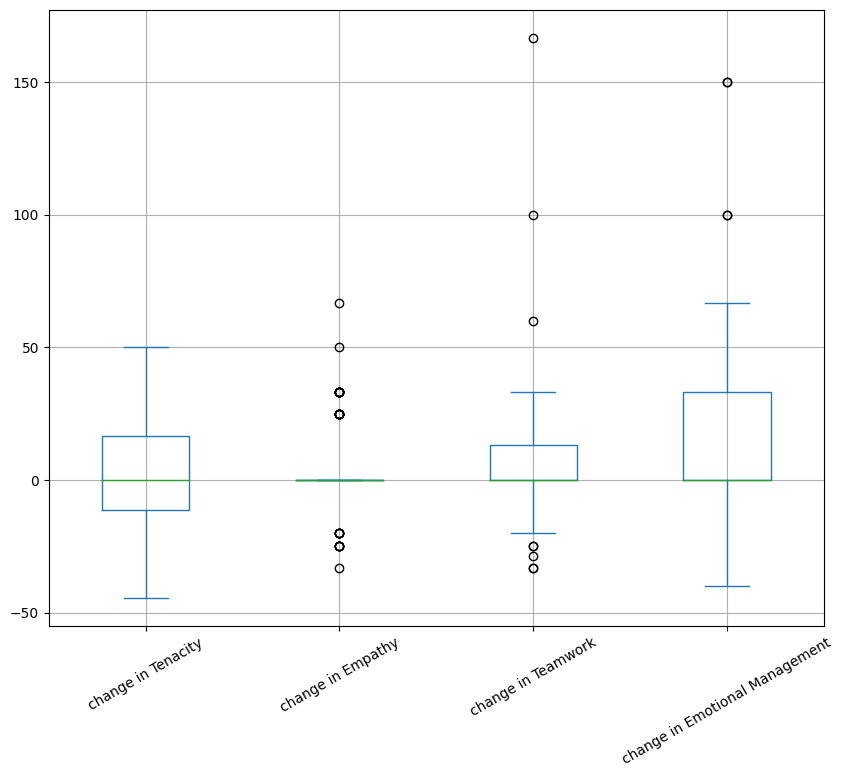

In [42]:
data6_selected.plot.box(figsize=(10, 8), rot=30, grid=True)

From the above boxplot and summary of statistics, we can see that, overall, there is no change in any of the categories of the NYC youth development outcomes as the median of change for every category is 0 percentage points.

The change in Emotional Management varied the most while the change in Empathy varied the least, as visualised by the spread of IQR data in the boxplots as well as the standard deviations shown above.

Now, we will be performing t-tests to see whether these changes in the different categories are significant.

In [44]:
data6 = data6[["Tenacity_pre", "Tenacity_post", 
"Empathy_pre", "Empathy_post", 
"Teamwork_pre", "Teamwork_post", 
"Emotional Management_pre", "Emotional Management_post"]]
data6.describe()

,Tenacity_pre,Tenacity_post,Empathy_pre,Empathy_post,Teamwork_pre,Teamwork_post,Emotional Management_pre,Emotional Management_post
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,99.000000
mean,69.696970,70.808081,78.181818,81.010101,78.080808,79.89899,71.515152,78.383838
std,13.359591,12.831464,14.594075,14.672962,15.822792,14.53321,16.435628,14.193062
min,40.000000,50.000000,40.000000,40.000000,30.000000,40.00000,40.000000,60.000000
25%,60.000000,60.000000,60.000000,80.000000,70.000000,70.00000,60.000000,60.000000
50%,70.000000,70.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000
75%,80.000000,80.000000,80.000000,100.000000,90.000000,90.00000,80.000000,80.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000


In [45]:
def runtest4(x):
    group1 = data6[x+"_pre"]
    group2 = data6[x+"_post"]
    return sp.ttest_ind(group1, group2, equal_var=False)

In [46]:
runtest4("Tenacity")

TtestResult(statistic=-0.5968274993523431, pvalue=0.5513124390783852, df=195.68199912285948)

In [47]:
runtest4("Empathy")

TtestResult(statistic=-1.3598002073001674, pvalue=0.1754553557732057, df=195.99430418831045)

In [48]:
runtest4("Teamwork")

TtestResult(statistic=-0.8420420892602368, pvalue=0.4007980264847971, df=194.60026322478757)

In [49]:
runtest4("Emotional Management")

TtestResult(statistic=-3.1471461300311243, pvalue=0.0019117358697440109, df=191.92818015110396)

From the above t-tests for significance in the change in responses in each NYC youth development category after playing Beantastic, there was an overall significant change in Emotional Management at 5% significance level as its p-value is 0.00191. However, none of the other categories were statistically significant at 5% significance level.

This implies that playing Beantastic would most likely help with regards to managing emotions, as we had concluded in section 1.2.

However, other aspects of Youth Development such as Empathy, Tenacity and Teamwork may not change significantly after playing the game.

### Question 2: Is there a relationship in the way participants respond among the different categories (eg emotional intelligence vs empathy, emotional resilience and social support etc)

Firstly, we will be doing a correlation test to see if there are any significant correlations between the different categories.

<Axes: >

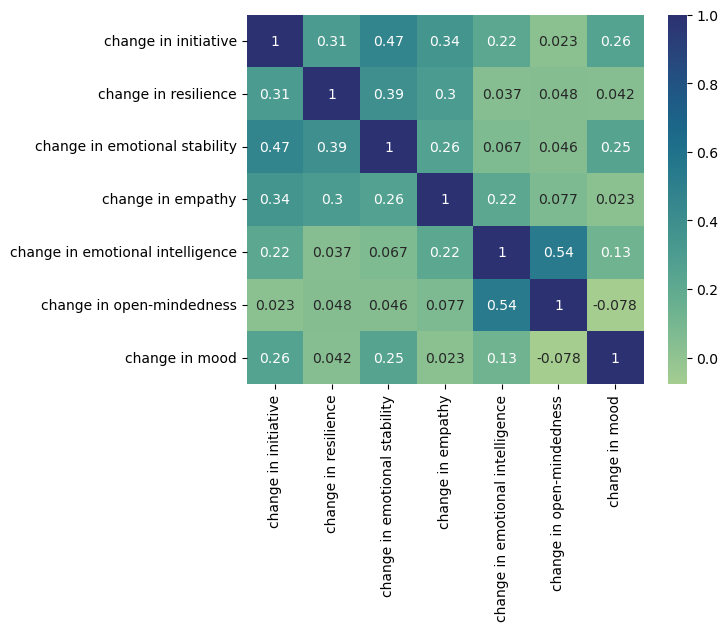

In [ ]:
sns.heatmap(df2.corr(), annot=True, cmap="crest")

From the above correlation matrix, there is no strong correlation between the way that the different categories are answered. 

In [ ]:
group1 = df['change in initiative']
group2 = df['change in resilience']
group3 = df['change in emotional stability'] 
group4 = df['change in empathy']
group5 = df['change in emotional intelligence'] 
group6 = df['change in open-mindedness']
group7 = df["change in mood"]

sp.bartlett(group1, group2, group3, group4, group5, group6, group7)
sp.f_oneway(group1, group2, group3, group4, group5, group6, group7)


F_onewayResult(statistic=22.478055034968673, pvalue=3.0256747566593077e-24)

<Axes: >

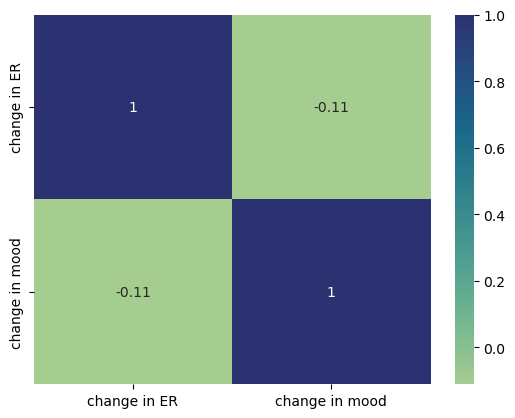

In [ ]:
data5 = pd.DataFrame()
data5["change in ER"] = data2_selected["change in ER"]
data5["change in mood"] = df["change in mood"]
sns.heatmap(data5.corr(), annot=True, cmap="crest")

There is no significant correlation between change in emotional regulation as defined by the EAI and change in mood.

### Question 3: Does the demographic affect the extent of change in the kind of mindsets they have (eg emotional resilience) (consider pre data)

#### Question 3.1: Does the age of participants affect the extent of changes in their responses?

In [ ]:
agedf = df[["please select your age group", "change in mood"]]
agedf.columns = ["age", "change"]
agedf["age"] = agedf.age.astype("category")
agedf = pd.get_dummies(agedf, dtype=int, drop_first=True)
agedf


,change,age_2,age_3,age_4,age_5,age_6,age_7
0,72.727273,1,0,0,0,0,0
1,-5.555556,1,0,0,0,0,0
2,5.263158,1,0,0,0,0,0
3,100.000000,1,0,0,0,0,0
4,50.000000,0,0,0,1,0,0
...,...,...,...,...,...,...,...
94,11.111111,0,1,0,0,0,0
95,12.500000,1,0,0,0,0,0
96,0.000000,0,1,0,0,0,0
97,10.000000,0,1,0,0,0,0


In [ ]:
model = smf.ols(formula='change ~ age_2 + age_3 + age_4 + age_5 + age_6 + age_7', data=agedf)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.5592
Date:                Thu, 19 Dec 2024   Prob (F-statistic):              0.762
Time:                        14:05:58   Log-Likelihood:                -536.80
No. Observations:                  99   AIC:                             1088.
Df Residuals:                      92   BIC:                             1106.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4318     40.181      0.608      0.5

None of the p-values of either the intercept or the coefficients of age dummy variables are statistically significant at 5% level of significance, and the overall p-value of the model is not statistically significant. Thus, there is insufficient evidence to conclude that the age group of participants affects the extent of change in mood of participants.

In [ ]:
agedf2 = df[["please select your age group", "mood_pre"]]
agedf2.columns = ["age", "mood"]
agedf2["age"] = agedf2.age.astype("category")
agedf2 = pd.get_dummies(agedf2, dtype=int, drop_first=True)
agedf2


,mood,age_2,age_3,age_4,age_5,age_6,age_7
0,44.0,1,0,0,0,0,0
1,72.0,1,0,0,0,0,0
2,76.0,1,0,0,0,0,0
3,32.0,1,0,0,0,0,0
4,40.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
94,72.0,0,1,0,0,0,0
95,64.0,1,0,0,0,0,0
96,80.0,0,1,0,0,0,0
97,40.0,0,1,0,0,0,0


In [ ]:
model = smf.ols(formula='mood ~ age_2 + age_3 + age_4 + age_5 + age_6 + age_7', data=agedf2)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   mood   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.5988
Date:                Wed, 08 Jan 2025   Prob (F-statistic):              0.731
Time:                        10:50:33   Log-Likelihood:                -415.91
No. Observations:                  99   AIC:                             845.8
Df Residuals:                      92   BIC:                             864.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.0000     11.850      4.557      0.0

None of the p-values of the coefficients of age dummy variables are statistically significant at 5% level of significance, and the overall p-value of the model is not statistically significant. Thus, there is insufficient evidence to conclude that the age group of participants affects the extent of change in mood of participants.

In [ ]:
agedata = pd.DataFrame()
agedata["age"] = df["please select your age group"]
agedata["ER"] = data2["ER_pre"]
agedata["age"] = agedata.age.astype("category")
agedata = pd.get_dummies(agedata, dtype=int, drop_first=True)
agedata

,ER,age_2,age_3,age_4,age_5,age_6,age_7
0,65.0,1,0,0,0,0,0
1,60.0,1,0,0,0,0,0
2,70.0,1,0,0,0,0,0
3,60.0,1,0,0,0,0,0
4,55.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
94,65.0,0,1,0,0,0,0
95,70.0,1,0,0,0,0,0
96,70.0,0,1,0,0,0,0
97,40.0,0,1,0,0,0,0


In [ ]:
model = smf.ols(formula='ER ~ age_2 + age_3 + age_4 + age_5 + age_6 + age_7', data=agedata)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     ER   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.120
Date:                Wed, 08 Jan 2025   Prob (F-statistic):              0.357
Time:                        11:46:09   Log-Likelihood:                -350.23
No. Observations:                  99   AIC:                             714.5
Df Residuals:                      92   BIC:                             732.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.0000      6.103      9.831      0.0

None of the p-values of the coefficients of age dummy variables are statistically significant at 5% level of significance, and the overall p-value of the model is not statistically significant. Thus, there is insufficient evidence to conclude that the age group of participants affects the emotional regulation levels of participants before the game.

In [ ]:
agedata2 = pd.DataFrame()
agedata2["age"] = df["please select your age group"]
agedata2["ER"] = data2["change in ER"]
agedata2["age"] = agedata2.age.astype("category")
agedata2 = pd.get_dummies(agedata2, dtype=int, drop_first=True)
agedata2

,ER,age_2,age_3,age_4,age_5,age_6,age_7
0,0.000000,1,0,0,0,0,0
1,8.333333,1,0,0,0,0,0
2,-14.285714,1,0,0,0,0,0
3,0.000000,1,0,0,0,0,0
4,27.272727,0,0,0,1,0,0
...,...,...,...,...,...,...,...
94,0.000000,0,1,0,0,0,0
95,-7.142857,1,0,0,0,0,0
96,0.000000,0,1,0,0,0,0
97,12.500000,0,1,0,0,0,0


In [ ]:
model = smf.ols(formula='ER ~ age_2 + age_3 + age_4 + age_5 + age_6 + age_7', data=agedata2)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     ER   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.1966
Date:                Wed, 08 Jan 2025   Prob (F-statistic):              0.977
Time:                        11:48:33   Log-Likelihood:                -407.70
No. Observations:                  99   AIC:                             829.4
Df Residuals:                      92   BIC:                             847.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2448     10.906      0.481      0.6

None of the p-values of the coefficients of age dummy variables are statistically significant at 5% level of significance, and the overall p-value of the model is not statistically significant. Thus, there is insufficient evidence to conclude that the age group of participants affects the change in emotional regulation of participants after the game.

#### Question 3.2: Does the job status of participants affect the extent of changes in their responses?

In [ ]:
jobdf = df[["job status", "change in mood"]]
jobdf.columns = ["job", "change"]
jobdf["job"] = jobdf.job.astype("category")
jobdf = pd.get_dummies(jobdf, dtype=int, drop_first=True)
jobdf # group broader, eg uni vs poly + ite

,change,job_2,job_3,job_4,job_6,job_7,job_8,job_10,job_12,job_13
0,72.727273,0,0,0,0,0,0,0,0,0
1,-5.555556,0,0,0,0,0,0,0,0,0
2,5.263158,0,0,0,0,0,0,0,0,0
3,100.000000,0,0,0,0,1,0,0,0,0
4,50.000000,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
94,11.111111,1,0,0,0,0,0,0,0,0
95,12.500000,1,0,0,0,0,0,0,0,0
96,0.000000,0,0,0,1,0,0,0,0,0
97,10.000000,0,0,0,1,0,0,0,0,0


1 - jc
2 - poly
3 - ite
4 - uni
5 - NS 
6 - working
7 - in transition
8 - other 
9 - jc and working
10 - poly and working
11 - ite and working
12 - uni and working
13 - NS and working
14 - in transition and working

In [ ]:
model2 = smf.ols(formula='change ~ job_2 + job_3 + job_4 + job_6 + job_7 + job_8 + job_10 + job_12 + job_13', data=jobdf)
print(model2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.8651
Date:                Thu, 19 Dec 2024   Prob (F-statistic):              0.559
Time:                        14:29:34   Log-Likelihood:                -534.42
No. Observations:                  99   AIC:                             1089.
Df Residuals:                      89   BIC:                             1115.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.1470     18.801      2.986      0.0

None of the p-values of the coefficients of job dummy variables are statistically significant at 5% level of significance, and the overall p-value of the model is not statistically significant. Thus, there is insufficient evidence to conclude that the job status of participants affects the extent of change in mood of participants.

In [ ]:
jobdf = df[["job status", "change in mood"]]
jobdf.columns = ["job", "change"]
jobdf["job"] = jobdf.job.astype("category")
jobdf = pd.get_dummies(jobdf, dtype=int, drop_first=True)
jobdf # group broader, eg uni vs poly + ite

### Other findings

In [ ]:
x = df["social support_pre"]
y = df["mood_pre"] #mood post?
x = sm.add_constant(x)
model3 = sm.OLS(y, x)
results = model3.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               mood_pre   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     12.74
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           0.000558
Time:                        10:54:27   Log-Likelihood:                -411.70
No. Observations:                  99   AIC:                             827.4
Df Residuals:                      97   BIC:                             832.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 25.6576      8

From the above regression model, the coefficients of the intercept and social support before the game are statistically significant at 5% significance level, and the overall model is statistically significant. Thus, this suggests that an increase in social support levels before the game would lead to better moods before the game.

In [ ]:
x = df["social support_pre"]
y = df["mood_post"] 
x = sm.add_constant(x)
model3 = sm.OLS(y, x)
results = model3.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mood_post   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     14.85
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           0.000209
Time:                        10:54:56   Log-Likelihood:                -405.16
No. Observations:                  99   AIC:                             814.3
Df Residuals:                      97   BIC:                             819.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 39.7173      8

From the above regression model, the coefficients of the intercept and social support before the game are statistically significant at 5% significance level, and the overall model is statistically significant. Thus, this suggests that an increase in social support levels before the game would lead to better moods after the game.